# ALDS Tutorial 2: Containers, zoeken, sorteren

Ja!!! Welkom terug! Ik hoop dat jullie week 1 goed door zijn gekomen en weer zin hebben in week 2! 

Laten we eerst weer eens even beginnen met het doen van de nodige imports: 

In [2]:
import sys
assert sys.version_info.major == 3, "You need python 3." #Asserts zijn handig: ingebouwde unit-testjes in Python
print("Python version is {} -> okay".format(sys.version_info[0:30]))

import IPython
assert IPython.version_info[0] >= 7, "You need IPython >= 7"
print("IPython version is {} -> okay".format(IPython.version_info))

from matplotlib import pyplot as plt
import numpy as np
import time
import statistics as stats

Python version is (3, 8, 5, 'final', 0) -> okay
IPython version is (7, 13, 0, '') -> okay


Deze tutorial gaat weer gebruik maken van numpy arrays (np.array). Dit is een ontzettend fijn datatype dat erg geoptimaliseerd is (zowel qua memory, als runtime voor allerhande standaardfuncties). Bovendien is er gebruik van numpy arrays enorm flexibel. Deze datastructuur is dusdanig veel gebruikt en heeft zoveel impact gehad dat er een Nature-artikel (dat is één van de belangrijkste wetenschappelijke tijdschriften) over is verschenen: https://www.nature.com/articles/s41586-020-2649-2 (Zeker de moeite waard om eens te lezen). 

Qua tips voor het gebruik van numpy arrays raad ik de volgende youtube tutorial aan: https://www.youtube.com/watch?v=8Mpc9ukltVA

Wij gaan nu een aantal opdrachten doen waarbij we gebruik gaan maken van deze numpy arrays om datastructuren te maken op kop van een array. (Deze gebruik ik liever dan de Python list, omdat numpy arrays zoals gezegd echte arrays zijn.) 

## Opgave 1: een eigen Stack (een plek op silicoon)

Schrijf een eigen Stack-klasse op basis van een numpy array, waar alleen integers in mogen. Je mag zelf kiezen welk soort integers want in numpy mag je kiezen hoe groot de ints mogen zijn en of ze signed of unsigned moeten zijn. Je kan hiervoor dtype gebruiken bij het aanmaken van de array, bijvoorbeeld: dtype='int16' levert 16bit signed integers op. 

De Stack heeft een fixed capacity (de grootte van de array). Implementeer een klasse MyStack, waar in ieder geval de volgende functies in verwerkt zijn. Zet bij elke functie van de klasse een runtime-complexity analyse (dus de complexiteit middels de big-Oh notatie, en een korte uitleg daarvan). 
* push(int) (Zet een item op "kop" van de lijst - je mag zelf kiezen hoe de Stack groeit, return een boolean die zegt of het pushen gelukt it. Pushen lukt namelijk niet als de maximale capaciteit bereikt is.)
* pop() (Return en verwijder het element dat nu op kop van de Stack staat) 
* peek() (Return het element op kop van de Stack, maar verwijder hem niet) 
* isEmpty() (Return of de Stack nu leeg is, d.w.z., er nu geen elementen in staan)
* isFull() (Return of the maxCapacity bereikt is)

Daarna willen we graag de capaciteit kunnen vergroten. Voeg een functie toe 
* doubleCapacity() (Verdubbel de capaciteit van de Stack. Zorg ervoor dat de volgorde van de elementen op de Stack in tact blijft.) Wat is de runtime complexity (big-Oh) van deze functie? Leg dit uit in het commentaar.

Bedenk goede unit tests om de werking van de Stack te testen. Gebruik hiervoor het Python-commando "assert" (voor een voorbeeld, zie vorige tutorial). 

In [2]:
import numpy as np
import random

class myStack():
    """
    Class to make a stack

    EXAMPLE
    --------
    >>> stack = mystack(42)
    """    
    max_capacity = 0
    current_pos  = 0
    
    #Deze methode heeft een runtime van O(1), omdat je het object maar 
    #1 keer aanmaakt, np.zeros vult de lijst met n nullen.
    def __init__(self, max_capacity):
        """
        Constructor for Class myStack

        PARAMETERS
        ------------
        self	:	self
        max_capacity: the maximimum number of elements allowed on the stack.

        EXAMPLE
        --------
        >>> stack = mystack(42)
        """
        self.max_capacity = (max_capacity)
        self.array = np.zeros(self.max_capacity)
    
    #Deze methode heeft een runtime van O(1) omdat je maar een constant ding 
    #toevoegd aan de array
    def push(self, item):
        if self.current_pos == self.max_capacity:
            return False
        else:
            self.array[self.current_pos] = item
            self.current_pos += 1
            return True
        
    #Deze methode heeft een runtime van O(1) omdat je maar een constant 
    #ding uit de array verwijderd 
    def pop(self):
        self.current_pos -= 1
        answer = self.array[self.current_pos]
        self.array[self.current_pos] = 0.0
        return answer
    #Deze methode heeft een runtime van O(1) omdat je maar een constant
    #ding uit de array bekijkt
    def peek(self):
        return self.array[self.current_pos - 1]
    
    #Deze methode heeft een runtime van O(1) omdat je maar 1 vergelijking
    #doet tussen current position en 0
    def isEmpty(self):
        if(self.current_pos == 0):
            return True
        else:
            return False
        
    #Deze methode heeft een runtime van O(1) omdat je maar een vergelijking
    #doet tussen current_pos en max_capacity
    def isFull(self):
        if(self.current_pos == self.max_capacity):
            return True
        else:
            return False
        
    #Deze methode heeft een runtime van O(n) omdat je een loop hebt met
    #een lengte van max_capacity hoe groter n hoe langer de functie duurt         
    def doubleCapacity(self):
        newArray = np.zeros((self.max_capacity * 2))

        for i in range(self.max_capacity):
            newArray[i] = self.array[i]
        #Concatenate opzoeken 
        self.array = newArray
        self.max_capacity = (self.max_capacity * 2)
        
        
#ASSERTIONS        
stackSize = 42   
stack = myStack(stackSize)
assert(stack.isEmpty() == True), "The isEmpty() function does not work correctly"
assert(stack.isFull() == False), "The isFull() function does not work correctly, the stack is empty but the function says its not."
stack.push(2)
stack.push(4)
assert(stack.peek() == 4.0), "The peek() function does not work correctly"
assert(stack.pop() == 4.0), "The pop() function does not work correctly"

for i in range(0, stackSize, 1):
    stack.push(random.randint(0, 99))
assert(stack.isFull() == True), "The isFull() function does not work correctly, the stack is full but the function says its not."
assert(stack.push(2) == False), "The push() function does not work correctly, it can push an item to a full stack"
stack.doubleCapacity()
assert(stack.max_capacity == (stackSize * 2)), "The doubleCapacity() function does not work correctly"
assert(stack.isFull() == False), "The isFull() function does not work correctly, the stack is not full but the function says it is."
stack.push(2)
assert(stack.peek() == 2.0), "The peek() function does not work correctly"

## Opgave 2: Quick-sort en meer Quick-sort

De runtime van Quick-sort is erg afhankelijk van de keuze van de pivot. We gaan in deze opgave hiervoor verschillende alternatieven bekijken en vergelijken om te zien wat daar het effect van is; zowel theoretisch (in termen van de big-Oh) als in de praktijk (door runtime te meten). 

* Schrijf een functie voor het sorteren van een numpy array met Quicksort. (Zie Algoritmes 16 en 17 van hoofdstuk 7.3 in de reader)
* Pas de functie zo aan dat het aantal keer dat twee waardes vergeleken worden ook wordt gereturnt (naast de gesorteerde lijst). (NB: in Python kan je meerdere dingen tegelijk teruggeven bij een functie.) 
* Schrijf een test-functie, waarbij de gemiddelde waarde van het (bovenstaande) aantal vergelijkingen wordt geschat, door het algoritme X keer voor verschillende random lijsten van lengte L te runnen. Geef naast dit gemiddelde ook de standaardafwijking (standard deviation) terug.  
* Schrijf nu een tweede versie van quick-sort, maar nu zo dat de pivot anders wordt gekozen. Namelijk, neem de minimale waarde van tussen (en inclusief) $lo$ en $hi$ (in de array $a$) als de pivot. Geef wederom het aantal vergelijkingen terug. 
* Vergelijk de twee versies van quicksort voor verschillende groottes van arrays, en plot de resultaten middels matplotlib.pyplot (zoals we ook in de vorige tutorial hadden gedaan), vergeet niet de standaardafwijking mee te plotten als een error region. 
* Wat valt je op in de resultaten? Was dit wat je verwachtte? Verklaar je antwoord met een verwijzing naar de time complexity (big-Oh) van QuickSort. 
* Laten we nog eens iets anders proberen voor de pivot. Schrijf nog een alternatieve versie van quicksort die op regel 1 in plaats van een random pivot of de minimumwaarde, nu de **mediaan** van de elementen tussen $lo$ and $hi$ (uit $a$) pakt. Voor de mediaan pakken we de middelste waarde. Bijvoorbeeld, de mediaan van {1, 7, 3, 8, 3, 9, 6} is 6. In Python 3 is dit geïmplementeerd met de standaardfunctie **median()** in de **statistics** module. maak even arrays 1 langer om een gehele median te krijgen.
* Vergelijk deze nieuwe versie door middel van je testfunctie voor verschillende groottes van inputlijsten, en voeg de resultaten toe aan je plot. 
* Schrijf nu een nieuwe testfunctie die de resultaten in termen van runtime vergelijkt in plaats van het aantal vergelijkingen, en plot de resultaten voor de drie alternatieve quick-sorts. 
* Licht de resultaten toe, en verklaar de verschillen?
* Wat het een goed idee om de mediaan te pakken als pivot? Waarom wel/niet? (Gebruik de time complexity in termen van big-Oh om hier antwoord op te geven.) 

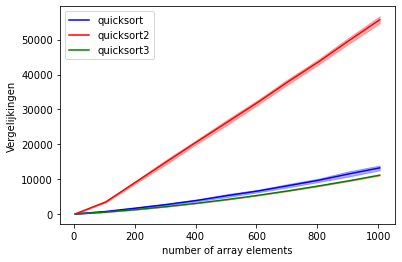

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import statistics as stats

def random_int_array(length):
    array = np.random.randint(0, high=100, size=length, dtype='l')
    return array

def partition(arr, lo, hi):
    pivot = arr[hi]
    i = lo
    for j in range(lo, hi):
        partition.counter += 1
        if arr[j] <= pivot :
            arr[i], arr[j] = arr[j], arr[i]
            i+=1
    arr[i], arr[hi] = arr[hi], arr[i]
    return i

def quicksort(arr, lo, hi):
    
    if lo >= hi:
        return arr
    
    p   = partition(arr, lo, hi)
    arr = quicksort(arr, lo, (p-1))
    arr = quicksort(arr, (p+1), hi)
    return arr

def partition2(arr, lo, hi):
    smallestIndex = 0;
    smallestValue = arr[0];
    for i in range(lo, hi):
        if(arr[i] < smallestValue):
            smallestValue = arr[i]
            smallestIndex = i
    arr[hi], arr[smallestIndex] = arr[smallestIndex], arr[hi] #Switch pivot with hi
    pivot = arr[hi]
    i = lo
    for j in range(lo, hi):
        partition2.counter += 1
        if arr[j] <= pivot :
            arr[i], arr[j] = arr[j], arr[i]
            i+=1
            
    arr[i], arr[hi] = arr[hi], arr[i]
    return i

def quicksort2(arr, lo, hi):
    # quicksort2.counter += 1
    
    if lo >= hi:
        return arr
    
    p   = partition2(arr, lo, hi)
    arr = quicksort2(arr, lo, (p-1))
    arr = quicksort2(arr, (p+1), hi)
    return arr

def partition3(arr, lo, hi):
    meanIndex = arr[lo]
    meanArray = arr[lo:(hi+1)]
    meanValue = 0
    if(len(meanArray) % 2) == 0: 
        newAppendedArray = np.append(meanArray, arr[hi])    
        meanValue = stats.median(newAppendedArray)
        meanIndex = np.where(newAppendedArray == meanValue)[0][0] + lo
    else:
        meanValue = stats.median(meanArray)
        meanIndex = np.where(meanArray == meanValue)[0][0] + lo
    arr[hi], arr[meanIndex] = arr[meanIndex], arr[hi] #Switch pivot with hi
    pivot = arr[hi]
    i = lo
    for j in range(lo, hi):
        partition3.counter += 1
        if arr[j] <= pivot :
            arr[i], arr[j] = arr[j], arr[i]
            i+=1
            
    arr[i], arr[hi] = arr[hi], arr[i]
    return i

def quicksort3(arr, lo, hi):
    # quicksort3.counter += 1
    
    if lo >= hi:
        return arr
    
    p   = partition3(arr, lo, hi)
    arr = quicksort3(arr, lo, (p-1))
    arr = quicksort3(arr, (p+1), hi)
    return arr

mean_quicksort=[]
stdev_quicksort=[]
mean_quicksort2=[]
stdev_quicksort2=[]
mean_quicksort3=[]
stdev_quicksort3=[]
meetpunten = list(range(5,1006,100))
for i in meetpunten:
    std  =[]
    std2 =[]
    std3 =[]
    
    for j in range(50): 
        partition.counter  = 0
        partition2.counter = 0
        partition3.counter = 0
        
        arr = random_int_array(i)
        res = quicksort(arr, 0, (i-1))
        arr = random_int_array(i)
        res = quicksort2(arr, 0, (i-1))
        arr = random_int_array(i)
        res = quicksort3(arr, 0, (i-1))
        
        std.append(partition.counter)
        std2.append(partition2.counter)
        std3.append(partition3.counter)
        
    mean_quicksort.append(stats.mean(std))
    stdev_quicksort.append(stats.stdev(std))
    mean_quicksort2.append(stats.mean(std2))
    stdev_quicksort2.append(stats.stdev(std2))
    mean_quicksort3.append(stats.mean(std3))
    stdev_quicksort3.append(stats.stdev(std3))
    
plt.plot(meetpunten, mean_quicksort, 'b-')
plt.fill_between(meetpunten, np.array(mean_quicksort)-np.array(stdev_quicksort), np.array(mean_quicksort)+np.array(stdev_quicksort), color='b', alpha=0.3)
plt.plot(meetpunten, mean_quicksort2, 'r-')
plt.fill_between(meetpunten, np.array(mean_quicksort2)-np.array(stdev_quicksort2), np.array(mean_quicksort2)+np.array(stdev_quicksort2), color='r', alpha=0.3)
plt.plot(meetpunten, mean_quicksort3, 'g-')
plt.fill_between(meetpunten, np.array(mean_quicksort3)-np.array(stdev_quicksort3), np.array(mean_quicksort3)+np.array(stdev_quicksort3), color='r', alpha=0.3)
plt.xlabel("number of array elements")
plt.ylabel("Vergelijkingen")
plt.legend(["quicksort", "quicksort2","quicksort3"])
plt.show()


*beantwoordt hier de vragen van opgave 2*

Quicksort heeft een complexiteit van O(n^2), Quicksort2 heeft een complexiteit van O(n log n), dit komt omdat als je altijd de kleinste waarde de pivot maakt zoek je in essentie de kleinste waarde en zet je deze aan het begin van de lijst. 
Quicksort3 heeft een net iets betere complexiteit dan de originele quicksort omdat je nu telkens de lijst in 2 gelijke helfden splitst en dus minder vergelijkingen hoeft te doen.

## Opgave 3: Priority Queue (waarin we zelf een datastructuur gaan kiezen om een andere datastructuur bovenop te bouwen)

**NB: voor deze opgave heb je een partner nodig. (Nee, geen romantische partner, een practicumpartner die ook deze cursus volgt.) Neem contact op met het groepje waarin je bent ingedeeld voor de besprekingsmomenten, en bespreek vooraf de keuzes voor deze opgave (qua datastructuur). Het is van belang dat niet iedereen dezelfde datastructuur pakt namelijk, anders valt er weinig te vergelijken. *Als je niet bent ingedeeld, of je je groepsgenoten reageren niet, neem dan zsm even contactop met Marius of Diederik, dan zoeken we naar een oplossing.*  **

PriorityQueues zijn een datastructuur met de volgende eigenschappen: 
* Het is een wachtrij, waarbij elk element een *prioriteit* toegekend krijgt. Deze prioriteit is meestal een integer, (maar soms kan het ook een float zijn). 
* Bij gelijke *prioriteit* (dus bijvoorbeeld, alle elementen in de rij hebben prioriteit *1*) gedraagt een priority queue zich net zoals een queue; first in first out (FIFO)
* Echter, als er een element met een hogere prioriteit wordt toegevoegd gaat deze eerst. 

Priority Queues worden veel gebruikt bij dingen als task-scheduling binnen applicaties, het OS, of de cloud (https://www.researchgate.net/publication/257726215_A_Priority_Based_Job_Scheduling_Algorithm_in_Cloud_Computing), wachtrijen voor verzenden (telefoongespreken zijn belangrijker dan e-mails want ze moeten real-time) (https://patentimages.storage.googleapis.com/72/1a/c2/7cd0205566e125/US7310670.pdf), maar ook bijvoorbeeld binnen zelf-lerende systemen door te kijken naar welke "ervaringen" de meeste leeropbrengst zouden opleveren (en die dan eerst verwerken) zodat het systeem sneller leert (https://link.springer.com/content/pdf/10.1007/BF00993104.pdf). 

In deze opgave gaan we kijken naar hoe we een priority kunnen bouwen, bovenop eenvoudigere datastructuren. De datastructuur onliggend aan een PriorityQueue zouden we namelijk wel eens anders moeten kunnen willen kiezen dan een gewone queue: het inserten van nieuwe elementen (die nu midden in de queue zouden kunnen komen) is namelijk een stuk lastiger (we zouden makkelijk elementen moeten kunnen toevoegen in het midden van de priority queue).

Enkele tips hierbij: kijk alvast eens naar recursieve datastructuren (volgend college) zoals de doubly linked list. Of verzin zelf een slimme list om priorities er goed in te krijgen. (Je zou bijvoorbeeld voordeel kunnen hebben als je van te voren al weet dat er bijvoorbeeld tien mogelijke prioriteiten zijn - als je zo'n aanname wilt maken, geef dit dan duidelijk aan in het commentaar.) Als je helemaal los wilt gaan, kijk dan eens naar de heap datastructuur (ook wel een heap-boom, https://en.wikipedia.org/wiki/Heap_(data_structure) , NB: dit is niet hetzelfde als de "heap" als rereserveerde geheugenruimte op een chip; daar wordt ongelukkigerwijs helaas dezelfde naam voor gebruikt, maar is iets compleet anders.)

* Onderzoek samen met je practicumpartner mogelijke keuzes voor de onderliggende datastructuur voor een priority queue, en spreek af wie welke gaat doen. (Twee verschillenden)
* Leg voor de keuze die jij zelf gaat implementeren waarom jullie deze gekozen hebben. 
* Implementeer de priority queue met de gekozen datastructuur, en daarbij de volgende functies: 
    * **queue(v, p)** adds value $v$ with priority $p$ to the queue.
    * **dequeue()** returns the value with the highest priority and removes the element from the queue.
    * **contains(v)** returns \textit{True} if and only if the queue contains value $v$.
    * **remove(e)** removes all elements with value $v$ from the queue.
* Analyseer de time complexity van deze priority queue functies zoals je ze hebt geïmplementeerd. Zet je analyse in het commentaar bij de code (zowel de argumentatie als het big-Oh resultaat).
* Schrijf een testfunctie voor alle bovenstaande functies om de runtime te meten bij het inserten (queue) van X random waardes met random prioriteiten, het dequeuen van al deze X waarden, het vinden (contains) van Y random waarden (uiteraard kleiner dan X, en te testen vóór alles gedequeued is), en het removen van Z waarden (wederom kleiner dan X en het best los te testen onafhankelijk van de andere functies). 
* Neem nu de implementatie over van je practicumpartner in een aparte cell, en maak daaronder een runtimevergelijking voor alle vier de functies. Plot de resultaten met matplotlib.pyplot, met zowel de gemiddelden als de standaardafwijken (als error regions), zoals we gewend zijn van de eerste tutorial. 
* Welke verschillen zie je in de plotjes? Kan je dit verklaren? Zijn er bijvoorbeeld verschillen qua time complexity?


*leg hier je keuze voor de onderliggende datastructuur uit*

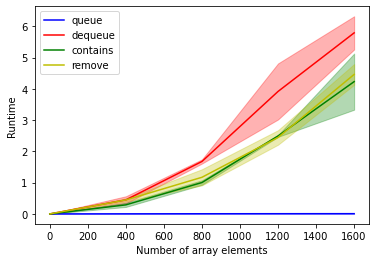

In [4]:
# -*- coding: utf-8 -*-
import numpy as np
import random
import time
import warnings
import statistics as stats
from matplotlib import pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)

class myStack(): #Stack class from previous exercise
    max_capacity = 0
    current_pos  = 0
    
    def __init__(self, max_capacity):
        self.max_capacity = (max_capacity)
        self.array = np.zeros(self.max_capacity, dtype='i')
    
    def push(self, item):
        if self.current_pos == self.max_capacity:
            return False
        else:
            self.array[self.current_pos] = item
            self.current_pos += 1
            return True
        
    def pop(self):
        self.current_pos -= 1
        answer = self.array[self.current_pos]
        self.array[self.current_pos] = -1
        return answer
    
    def peek(self):
        return self.array[self.current_pos - 1]
    
    def isEmpty(self):
        if(self.current_pos == 0):
            return True
        else:
            return False
        
    def isFull(self):
        if(self.current_pos == self.max_capacity):
            return True
        else:
            return False
        
    def doubleCapacity(self):
        newArray = np.zeros((self.max_capacity * 2))

        for i in range(self.max_capacity):
            newArray[i] = self.array[i]
        
        self.array = newArray
        self.max_capacity = (self.max_capacity * 2)
    
    def print_stack(self): # Debugging purposes only
        print("\nStack content: ", self.array)

                            #End of Stack class
                           #PriorityQueue Class
        
class pqueue():
        
    def __init__(self, max_capacity=11):
        self.max_capacity = (max_capacity)
        self.array =  np.zeros((max_capacity,),dtype='i,i')
        self.available_indexes = myStack(max_capacity + 1)
        for i in range(-1, max_capacity, 1):
            self.available_indexes.push(i)
    
    #Deze functie heeft een tijd complexiteit van O(1), dit komt omdat hij 
    #niet door de array hoeft te loopen aangezien we een stack hebben
    #van beschikbare plekken. 
    def queue(self, v, p): 
        if self.available_indexes.peek() == -1:
            return "Queue is full..."
        else:
            self.array[self.available_indexes.pop()] = (v, p)

    #Deze funcite heeft een tijd complexiteit van O(n), je moet namelijk door
    #de array loopen om de laagste index te vinden. Je kan niet tot de 
    #nieuwste beschikbare index van onze beschikbare index array loopen 
    #omdet het zo kan zijn dat er een eental gaten nog niet gevuld zijn
    #met nieuwe items.     
    def dequeue(self):
        lowest_priority = 100
        index_of_lowest_priority = -1
        for i in range(self.max_capacity):
            if self.array[i][1] < lowest_priority and self.array[i][1] != 0:
                lowest_priority = self.array[i][1]
                index_of_lowest_priority = i
        self.array[index_of_lowest_priority] = (0,0)
        self.available_indexes.push(index_of_lowest_priority)
    
    #Voor deze functie geld eigenlijk hetzelfde als de dequeue functie
    #Hij heeft een tijdscomplexiteit van O(n), al hoeft deze functie niet
    #altijd over de hele lijst te loopen als hij als de waarde niet achteraan 
    #de lijst staat.
    def contains(self, v):
        for i in range(self.max_capacity):
            if self.array[i][0] == v:
                return True
        return False
     
    #Ook voor deze functie geld hetzelfde als voor contains en dequeue.
    #Hij heeft een tijdscomplexiteit van O(n) 
    def remove(self, v):
        for i in range(self.max_capacity):
            if self.array[i][0] == v:
                self.array[i] = (0,0)
                self.available_indexes.push(i)
    
    def print_queue(self): #For debugging purposes 
        print("Queue: ", self.array)
        
                        #End of PriorityQueue Class
                                #Test cases
'''
myqueue = pqueue()
print("\nQueue created")
myqueue.print_queue()
for i in range(0, 10):
    myqueue.queue(random.randint(1, 40), random.randint(1, 10))
myqueue.queue(20, 4) #Test case for contains/ remove functions
print(myqueue.queue(20, 4)) #Testing to queue an item to a full queue 
print("\nQueue has been filled") #Prints something when the queue is full.
myqueue.print_queue()
myqueue.dequeue()
print("\nLowest priority removed")
myqueue.print_queue()
if myqueue.contains(20) == True:
    print("Contains function found the value.")
else:
    print("Contains function did not find the value.")
myqueue.remove(20)
print("\nAll items with value 20 removed")
myqueue.print_queue()
myqueue.queue(42, 42) #Testing with an easy number to find
print("\nAn item has been added in the spot of a previously removed item")
myqueue.print_queue()
'''
                            #End of Test cases
                                #Plot code
                                
mean_queue=[]
stdev_queue=[]
mean_dequeue=[]
stdev_dequeue=[]
mean_contains=[]
stdev_contains=[]
mean_remove=[]
stdev_remove=[]
meetpunten = list(range(1, 2000, 400))
for i in meetpunten:
    std  =[] 
    std2 =[] 
    std3 =[]  
    std4 =[] 
    
    for x in range(2):
        #Queue test
        myqueue = pqueue(i)
        t1 = time.time()
        for j in range(i): 
            myqueue.queue(random.randint(1, 100), random.randint(1, 10))
        t2 = time.time()
        std.append(t2 - t1)
        
        #Contains test
        t1 = time.time()
        for j in range(i):
            myqueue.contains(j)
        t2 = time.time()
        std3.append(t2 - t1)
            
        #Remove test
        t1 = time.time()
        for j in range(i):
            myqueue.remove(j)
        t2 = time.time()
        std4.append(t2 - t1)
        
        myqueue = pqueue(i) # refill array
        for j in range(i): 
            myqueue.queue(random.randint(1, 100), random.randint(1, 10))
        
        #Dequeue test
        t1 = time.time()
        for j in range(i):
            myqueue.dequeue()
        t2 = time.time()
        std2.append(t2 - t1) 
        

    mean_queue.append(stats.mean(std))
    stdev_queue.append(stats.stdev(std))
    mean_dequeue.append(stats.mean(std2))
    stdev_dequeue.append(stats.stdev(std2))
    mean_contains.append(stats.mean(std3))
    stdev_contains.append(stats.stdev(std3))
    mean_remove.append(stats.mean(std4))
    stdev_remove.append(stats.stdev(std4))
    
    
plt.plot(meetpunten, mean_queue, 'b-')      #Blue
plt.fill_between(meetpunten, np.array(mean_queue)-np.array(stdev_queue), np.array(mean_queue)+np.array(stdev_queue), color='b', alpha=0.3)
plt.plot(meetpunten, mean_dequeue, 'r-')    #Red
plt.fill_between(meetpunten, np.array(mean_dequeue)-np.array(stdev_dequeue), np.array(mean_dequeue)+np.array(stdev_dequeue), color='r', alpha=0.3)
plt.plot(meetpunten, mean_contains, 'g-')   #Green
plt.fill_between(meetpunten, np.array(mean_contains)-np.array(stdev_contains), np.array(mean_contains)+np.array(stdev_contains), color='g', alpha=0.3)
plt.plot(meetpunten, mean_remove, 'y-')     #Yellow
plt.fill_between(meetpunten, np.array(mean_remove)-np.array(stdev_remove), np.array(mean_remove)+np.array(stdev_remove), color='y', alpha=0.3)
plt.xlabel("Number of array elements")
plt.ylabel("Runtime")
plt.legend(["queue", "dequeue","contains", "remove"])
plt.show()                               
                                
                            #End of Plot code


In [2]:
#neem hier de code van je practicumpartner over (NB: misschien zul je de class even moeten hernoemen
#maar het is wel handig om dezelfde functienamen te gebruiken)
class pQueue:
    
    def __init__(self):
            self.array = []
            self.numElements = 0
    
    # O(log(N))
    def verify(self, aIndex):
        if((aIndex+1) >= self.numElements // 2):
            return
        
        right = (aIndex+1) * 2
        left = right - 1
        toSwap = aIndex

        if(self.array[left][0] > self.array[toSwap][0]):
            toSwap = left

        if(self.array[right][0] > self.array[toSwap][0]):
            toSwap = right
        
        if(toSwap != aIndex):
            self.array[aIndex], self.array[toSwap] = self.array[toSwap], self.array[aIndex]
            self.verify(toSwap)
            
    # O(log(N))
    def queue(self, aVal, aPriority):
        self.array.append([aPriority, aVal])
        self.numElements += 1
                
        currElement = self.numElements
        currIndex = currElement - 1
        nodeAbove = (currElement // 2) - 1
        
        while (self.array[currIndex][0] > self.array[nodeAbove][0] and currElement != 1):
            self.array[currIndex], self.array[nodeAbove] = self.array[nodeAbove], self.array[currIndex]
            currElement = currElement // 2
            currIndex = currElement - 1
            nodeAbove = (currElement // 2) - 1
     
    # O(log(N))
    def dequeue(self):
        retVal = self.array[0]
        self._remove(0)
    
        return retVal
    
    # O(N)
    def contains(self, aVal):

        for i in range(self.numElements):
            if (self.array[i][1] == aVal):
                return True
                
        return False
    
    # O(N)
    def remove(self, aVal):
        i = 0
        while( i < self.numElements ):
            if (self.array[i][1] == aVal):
                self._remove(i)
                
            i += 1
     
    # O(1)
    def _remove(self, aIndex):
        self.array[aIndex], self.array[self.numElements-1] = self.array[self.numElements-1], self.array[aIndex]
        self.numElements -= 1
        self.array.pop()
        self.verify(aIndex)
        
    
    def __repr__(self):
        return self.array.__str__()

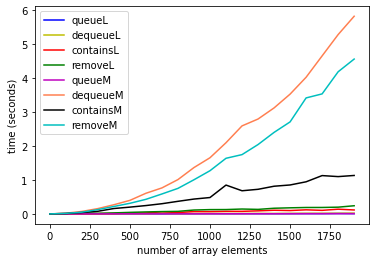

In [3]:
# -*- coding: utf-8 -*-
import numpy as np
import random as rand
import time
import warnings
import statistics as stats
from matplotlib import pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)

class myStack(): #Stack class from previous exercise
    max_capacity = 0
    current_pos  = 0
    
    def __init__(self, max_capacity):
        self.max_capacity = (max_capacity)
        self.array = np.zeros(self.max_capacity, dtype='i')
    
    def push(self, item):
        if self.current_pos == self.max_capacity:
            return False
        else:
            self.array[self.current_pos] = item
            self.current_pos += 1
            return True
        
    def pop(self):
        self.current_pos -= 1
        answer = self.array[self.current_pos]
        self.array[self.current_pos] = -1
        return answer
    
    def peek(self):
        return self.array[self.current_pos - 1]
    
    def isEmpty(self):
        if(self.current_pos == 0):
            return True
        else:
            return False
        
    def isFull(self):
        if(self.current_pos == self.max_capacity):
            return True
        else:
            return False
        
    def doubleCapacity(self):
        newArray = np.zeros((self.max_capacity * 2))

        for i in range(self.max_capacity):
            newArray[i] = self.array[i]
        
        self.array = newArray
        self.max_capacity = (self.max_capacity * 2)
    
    def print_stack(self): # Debugging purposes only
        print("\nStack content: ", self.array)

                            #End of Stack class
            
                           #PriorityQueue Class
        
class pqueue():
        
    def __init__(self, max_capacity=11):
        self.max_capacity = (max_capacity)
        self.array =  np.zeros((max_capacity,),dtype='i,i')
        self.available_indexes = myStack(max_capacity + 1)
        for i in range(-1, max_capacity, 1):
            self.available_indexes.push(i)
    
    #Deze functie heeft een tijd complexiteit van O(1), dit komt omdat hij 
    #niet door de array hoeft te loopen aangezien we een stack hebben
    #van beschikbare plekken. 
    def queue(self, v, p): 
        if self.available_indexes.peek() == -1:
            return "Queue is full..."
        else:
            self.array[self.available_indexes.pop()] = (v, p)

    #Deze funcite heeft een tijd complexiteit van O(n), je moet namelijk door
    #de array loopen om de laagste index te vinden. Je kan niet tot de 
    #nieuwste beschikbare index van onze beschikbare index array loopen 
    #omdet het zo kan zijn dat er een eental gaten nog niet gevuld zijn
    #met nieuwe items.     
    def dequeue(self):
        lowest_priority = 1000
        index_of_lowest_priority = -1 
        for i in range(self.max_capacity):
            if self.array[i][1] < lowest_priority and self.array[i][1] != 0:
                lowest_priority = self.array[i][1]
                index_of_lowest_priority = i
        self.array[index_of_lowest_priority] = (0,0)
        self.available_indexes.push(index_of_lowest_priority)
    
    #Voor deze functie geld eigenlijk hetzelfde als de dequeue functie
    #Hij heeft een tijdscomplexiteit van O(n), al hoeft deze functie niet
    #altijd over de hele lijst te loopen als hij als de waarde niet achteraan 
    #de lijst staat.
    def contains(self, v):
        for i in range(self.max_capacity):
            if self.array[i][0] == v:
                return True
        return False
     
    #Ook voor deze functie geld hetzelfde als voor contains en dequeue.
    #Hij heeft een tijdscomplexiteit van O(n) 
    def remove(self, v):
        for i in range(self.max_capacity):
            if self.array[i][0] == v:
                self.array[i] = (0,0)
                self.available_indexes.push(i)
    
    def print_queue(self): #For debugging purposes 
        print("Queue: ", self.array)
        
                        #End of PriorityQueue Class
                        
                          #Lucas's implementatie
class pQueue:
    
    def __init__(self):
            self.array = []
            self.numElements = 0
    
    # O(log(N))
    def verify(self, aIndex):
        if((aIndex+1) >= self.numElements // 2):
            return
        
        right = (aIndex+1) * 2
        left = right - 1
        toSwap = aIndex

        if(self.array[left][0] > self.array[toSwap][0]):
            toSwap = left

        if(self.array[right][0] > self.array[toSwap][0]):
            toSwap = right
        
        if(toSwap != aIndex):
            self.array[aIndex], self.array[toSwap] = self.array[toSwap], self.array[aIndex]
            self.verify(toSwap)
            
    # O(log(N))
    def queue(self, aVal, aPriority):
        self.array.append([aPriority, aVal])
        self.numElements += 1
                
        currElement = self.numElements
        currIndex = currElement - 1
        nodeAbove = (currElement // 2) - 1
        
        while (self.array[currIndex][0] > self.array[nodeAbove][0] and currElement != 1):
            self.array[currIndex], self.array[nodeAbove] = self.array[nodeAbove], self.array[currIndex]
            currElement = currElement // 2
            currIndex = currElement - 1
            nodeAbove = (currElement // 2) - 1
     
    # O(log(N))
    def dequeue(self):
        retVal = self.array[0]
        self._remove(0)
    
        return retVal
    
    # O(N)
    def contains(self, aVal):

        for i in range(self.numElements):
            if (self.array[i][1] == aVal):
                return True
                
        return False
    
    # O(N)
    def remove(self, aVal):
        i = 0
        while( i < self.numElements ):
            if (self.array[i][1] == aVal):
                self._remove(i)
                
            i += 1
     
    # O(1)
    def _remove(self, aIndex):
        self.array[aIndex], self.array[self.numElements-1] = self.array[self.numElements-1], self.array[aIndex]
        self.numElements -= 1
        self.array.pop()
        self.verify(aIndex)
        
    
    def __repr__(self):
        return self.array.__str__()
                    #Einde van lucas's implementatie    
    
                                #Plot code
def test_queue(dataPoints, c, M=True):
    result = [[],[],[],[]]
    for i in dataPoints:
        
        if(M):
            q = c(i)
        else:
            q = c()
        startTime = time.time()

        for j in range(i):
            q.queue(rand.randint(0,500), rand.randint(0,500))
            
        result[0].append(time.time() - startTime)
        
        startTime = time.time()
        for j in range(i):
            q.dequeue()
        result[1].append(time.time() - startTime)
        
        if(M):
            q = c(i)
        else:
            q = c()
        for j in range(i):
            q.queue(rand.randint(0,500), rand.randint(0,500))
            
        startTime = time.time()
        for j in range(i):
            q.contains(rand.randint(0,500))
       
        result[2].append(time.time() - startTime)
    
    
        startTime = time.time()
        for j in range(i):
            q.remove(rand.randint(0,500))
   
        result[3].append(time.time() - startTime)

    return result                                
    

data = range(1, 2000, 100)

results2 = test_queue(data, pqueue, True)
results = test_queue(data, pQueue, False)

plt.plot(data, results[0], 'b-')
plt.plot(data, results[1], 'y-')
plt.plot(data, results[2], 'r-')
plt.plot(data, results[3], 'g-')

plt.plot(data, results2[0], 'm-')
plt.plot(data, results2[1], 'coral')
plt.plot(data, results2[2], 'k-')
plt.plot(data, results2[3], 'c-')
plt.xlabel("number of array elements")
plt.ylabel("time (seconds)")
plt.legend(["queueL","dequeueL", "containsL", "removeL", "queueM","dequeueM", "containsM", "removeM"], loc='upper left')

plt.show()


*verklaar hier de verschillen in runtime tussen de twee implementaties (met verschillende onderliggende datastructuur)*

Voor de queue methoden lijkt het in de grafiek alsof beide functies even snel zijn, het verschil is ook wel klein, maar er zit zeker een verschil. Dat komt doordat de functie van Milo's implementatie een constante runtime heeft waar de implementatie van Lucas groeit met een snelheid van log(N).

In de dequeue methoden is een groter verschil aanwezig, de implementatie van Lucas is sneller dan die van Milo. Dat is makkelijk te verklaren aan de hand van de groei van de runtime van beide functies. Die van Lucas groeit met een snelheid van log(N), die van Milo met N.

De contains functie is in beide implementaties even snel, dat is logisch, de runtime van beide functies groeit met een snelheid van N.
Voor de remove functie geld hetzelfde.
